# DSP Practical HW3

# Instructor: Dr. Karbasi

# Name: Kimia Mohsenian

# Student Number: 97110671

# Spring 2021

In [1]:
import numpy as np
from numpy import imag
from pylab import *
from scipy import signal
import matplotlib.pyplot as plt

## Problem 1

zeros of the original system:  [-4.16333634e-16+1.41421356j -4.16333634e-16-1.41421356j
 -5.00000000e-01+0.j          5.00000000e-01+0.j        ]
poles of the original system:  [-0.56568542+0.56568542j -0.56568542-0.56568542j  0.56568542+0.56568542j
  0.56568542-0.56568542j]
-------------------------------------------------------------------------------------------------------------------
Zeros of minimum-phase system:  [(-0.5000000000000002+0j), (0.5+0j), 0.7071135624381276j, -0.7071135624381276j]
Poles of minimum-phase system:  [(-0.565685424949238+0.5656854249492382j), (-0.565685424949238-0.5656854249492382j), (0.565685424949238+0.565685424949238j), (0.565685424949238-0.565685424949238j)]
Zeros of all-pass system:  [(-4.163336342344337e-16+1.4142135623730956j), (-4.163336342344337e-16-1.4142135623730956j)]
Poles of all-pass system:  [0.7071135624381276j, -0.7071135624381276j]
------------------------------------------------------------------------------------------------------------

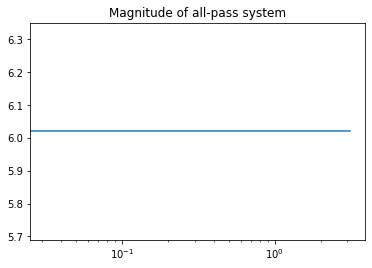

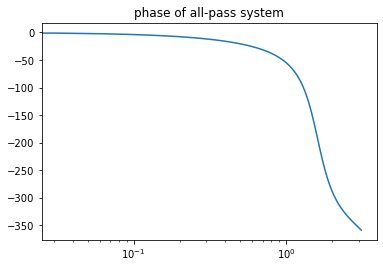

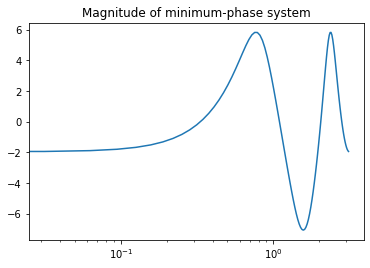

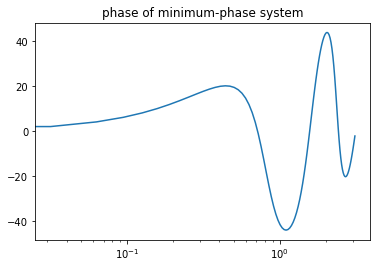

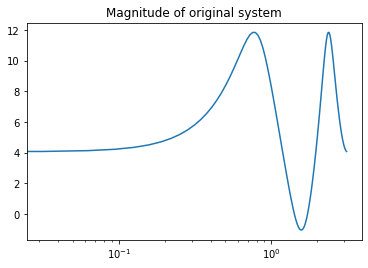

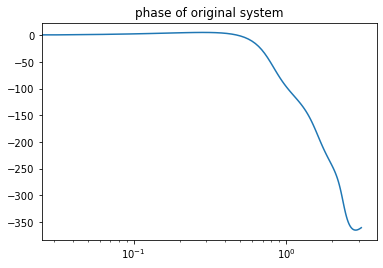

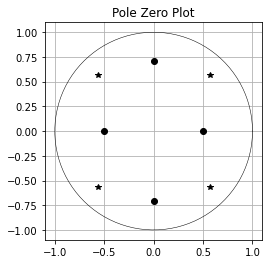

<Figure size 720x720 with 0 Axes>

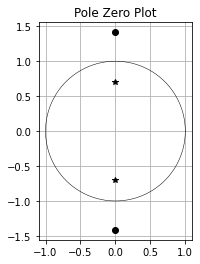

<Figure size 720x720 with 0 Axes>

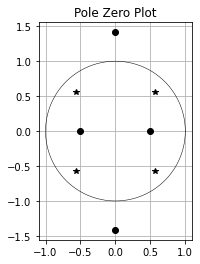

<Figure size 720x720 with 0 Axes>

In [2]:
def pole_zero_plot(zeros, poles):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    
    teta = linspace(0,np.pi*2,100)
    
    for i in zeros:
        x1.append(i.real)
        y1.append(i.imag)
        
    for i in poles:
        x2.append(i.real)
        y2.append(i.imag)
    
    x3 = cos(teta)
    y3 = sin(teta)
    
    fig, ax = plt.subplots()
    
    ax.plot(x1, y1, 'o', color="black" ,linewidth=0.7)
    ax.plot(x2, y2, '*', color="black",linewidth=0.7)
    ax.plot(x3, y3, color="black", linewidth=0.5)
    ax.set_aspect('equal', adjustable='box')
    ax.grid()
    ax.set_title("Pole Zero Plot")
    figure(figsize=(10, 10))
    
######### Part a

num = [1, 0, 1.75, 0, -0.5]
den = [1, 0, 0, 0, 0.4096]

z = np.roots(num)
p = np.roots(den)

print("zeros of the original system: ", z)
print("poles of the original system: ", p)
print("-------------------------------------------------------------------------------------------------------------------")

for i in range(len(z)):
    if (np.real(np.abs(z[i])))<0.00001:
        z[i] = 0 + imag(z[i])
    if (np.abs(z[i].imag)<0.00001):
        z[i] = np.real(z[i])

for i in range(len(p)):
    if (np.real(np.abs(p[i]))<0.00001):
        p[i] = 0 + imag(p[i])
    if (np.abs(p[i].imag)<0.00001):
        p[i] = np.real(p[i])       


min_phase_poles = [p[0], p[1], p[2], p[3]]
all_pass_poles = [complex(0,1/1.4142), complex(0,-1/1.4142)]
min_phase_zeros = [z[2], z[3], complex(0,1/1.4142) , complex(0,-1/1.4142)]
all_pass_zeros = [z[0], z[1]]

np.set_printoptions(precision=3)

print("Zeros of minimum-phase system: ", min_phase_zeros)
print("Poles of minimum-phase system: ", min_phase_poles)
print("Zeros of all-pass system: ", all_pass_zeros)
print("Poles of all-pass system: ", all_pass_poles)

print("----------------------------------------------------------------------------------------------------------------------")

all_pass_num_coefs = np.array(np.poly(all_pass_zeros))
all_pass_den_coefs = np.array(np.poly(all_pass_poles))
min_phase_num_coeffs = np.array(np.poly(min_phase_zeros))
min_phase_den_coeffs = np.array(np.poly(min_phase_poles))


np.set_printoptions(precision=3)
print("Coefficients of all_pass numerator: ", all_pass_num_coefs)
print("Coefficients of all_pass denominator: ", all_pass_den_coefs)
print("Coefficients of min_phase numerator: ", min_phase_num_coeffs)
print("Coefficients of min_phase denominator: ", min_phase_den_coeffs)

######### Part b


system_all_pass = signal.dlti(all_pass_num_coefs, all_pass_den_coefs)
system_min_phase = signal.dlti(min_phase_num_coeffs, min_phase_den_coeffs)
system_original_system = signal.dlti(num, den)

f = logspace(1, 5)


w, mag, phase = signal.dbode(system_all_pass)

for i in range(len(mag)):
    if (np.abs(mag[i]-6.02)) < 0.001:
        mag[i] = 6.02

plt.figure()
semilogx(w, mag)
plt.title("Magnitude of all-pass system")

plt.figure()
semilogx(w, phase)
plt.title("phase of all-pass system")

w1, mag1, phase1 = signal.dbode(system_min_phase)
plt.figure()
semilogx(w1, mag1)
plt.title("Magnitude of minimum-phase system")

plt.figure()
semilogx(w1, phase1)
plt.title("phase of minimum-phase system")

w2, mag2, phase2 = signal.dbode(system_original_system)
plt.figure()
semilogx(w2, mag2)
plt.title("Magnitude of original system")

plt.figure()
semilogx(w2, phase2)
plt.title("phase of original system")

######### part c
pole_zero_plot(min_phase_zeros,min_phase_poles)
pole_zero_plot(all_pass_zeros, all_pass_poles)
pole_zero_plot(z, p)
